In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv('projet_finale_vf2.csv')
df.head()

,Unnamed: 0,departement,tx_pauvrete,revenu_median,revenu_moyen,tx_crim_pour_100 M_hab,tx_chomage,tx_urbanisation,densite_2018_(hab/km²),tx_scolarisation_pop,tx_pop_sans_dipl
0,0,20,18.55,20060.0,3.6,3576.184249,9.425,71.85,39.0,58.633464,31.95
1,1,1,10.50,22640.0,3.4,3273.801197,6.750,67.00,112.0,58.320593,25.20
2,2,2,18.50,19100.0,3.1,3752.923347,12.950,53.20,72.0,57.655850,30.70
3,3,3,15.40,19750.0,3.0,3587.405470,9.675,58.30,46.0,58.484813,37.60
4,4,4,16.60,19940.0,3.2,4462.068755,10.700,61.90,24.0,58.337452,36.30


In [3]:
print(df.columns)

Index(['Unnamed: 0', 'departement', 'tx_pauvrete', 'revenu_median',
       'revenu_moyen', 'tx_crim_pour_100 M_hab', 'tx_chomage',
       'tx_urbanisation', 'densite_2018_(hab/km²)', 'tx_scolarisation_pop',
       'tx_pop_sans_dipl'],
      dtype='object')


In [4]:
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,departement,tx_pauvrete,revenu_median,revenu_moyen,tx_crim_pour_100 M_hab,tx_chomage,tx_urbanisation,densite_2018_(hab/km²),tx_scolarisation_pop,tx_pop_sans_dipl
0,20,18.55,20060.0,3.6,3576.184249,9.425,71.85,39.0,58.633464,31.95
1,1,10.50,22640.0,3.4,3273.801197,6.750,67.00,112.0,58.320593,25.20
2,2,18.50,19100.0,3.1,3752.923347,12.950,53.20,72.0,57.655850,30.70
3,3,15.40,19750.0,3.0,3587.405470,9.675,58.30,46.0,58.484813,37.60
4,4,16.60,19940.0,3.2,4462.068755,10.700,61.90,24.0,58.337452,36.30


In [5]:
print('nombre de lignes & de colonnes')
print(df.shape)
print('***********************************************')
print('descriptif du dataframe')
print(df.describe(include='all'))
print('***********************************************')
print('nombre de valeurs null')
print(df.isnull().sum().sum())
if df.isnull().sum().sum()!=0:
    print('nombre de valeur null par colonne')
    print(df.isnull().sum())
print('***********************************************')
print('aperçu des 5 premières lignes')
print(df.head())

nombre de lignes & de colonnes
(95, 10)
***********************************************
descriptif du dataframe
       departement  tx_pauvrete  revenu_median  revenu_moyen  \
count    95.000000    95.000000       95.00000     95.000000   
mean     48.000000    14.380526    20788.00000      3.174737   
std      27.568098     2.997670     1619.34489      0.486404   
min       1.000000     9.100000    17310.00000      2.600000   
25%      24.500000    12.350000    19865.00000      2.900000   
50%      48.000000    14.300000    20410.00000      3.100000   
75%      71.500000    15.450000    21320.00000      3.300000   
max      95.000000    27.900000    27400.00000      6.300000   

       tx_crim_pour_100 M_hab  tx_chomage  tx_urbanisation  \
count               95.000000   95.000000        95.000000   
mean              4132.519919    9.042632        68.030000   
std               1385.850369    1.704448        17.712418   
min               2325.981963    5.650000        21.400000   
2

In [6]:
df=df.drop(columns=['departement','revenu_moyen'],axis=1)
print(df.head())

   tx_pauvrete  revenu_median  tx_crim_pour_100 M_hab  tx_chomage  \
0        18.55        20060.0             3576.184249       9.425   
1        10.50        22640.0             3273.801197       6.750   
2        18.50        19100.0             3752.923347      12.950   
3        15.40        19750.0             3587.405470       9.675   
4        16.60        19940.0             4462.068755      10.700   

   tx_urbanisation  densite_2018_(hab/km²)  tx_scolarisation_pop  \
0            71.85                    39.0             58.633464   
1            67.00                   112.0             58.320593   
2            53.20                    72.0             57.655850   
3            58.30                    46.0             58.484813   
4            61.90                    24.0             58.337452   

   tx_pop_sans_dipl  
0             31.95  
1             25.20  
2             30.70  
3             37.60  
4             36.30  


In [7]:
print(df.columns)

Index(['tx_pauvrete', 'revenu_median', 'tx_crim_pour_100 M_hab', 'tx_chomage',
       'tx_urbanisation', 'densite_2018_(hab/km²)', 'tx_scolarisation_pop',
       'tx_pop_sans_dipl'],
      dtype='object')


##PREPROCESSING - Modèle Socio-eco (mse1)

In [8]:
#SPLIT dataset into X and Y

features_list_mse1=['tx_pauvrete', 'revenu_median', 'tx_chomage', 'tx_urbanisation', 'densite_2018_(hab/km²)', 'tx_scolarisation_pop']

print('Splitting dataset into X and Y...')
X_mse1=df[features_list_mse1]

y_mse1=df['tx_crim_pour_100 M_hab']
print('...Done.')

#SPLIT dataset into train test and test...
print('Splitting dataset into train test and test...')
X_mse1_train,X_mse1_test,y_mse1_train,y_mse1_test=train_test_split(X_mse1,y_mse1,
                                                               test_size=0.2,
                                                               random_state=0
                                                               )
print('...Done.')

### Training pipeline ###
print('---Training pipeline---')

# Before preprocessing
print("#### X_train BEFORE preprocessing ####")
print(X_mse1_train.head())  
print()

print("Encoding categorical features and standardizing numerical features...")

#Preprocessing

numeric_transformer = StandardScaler()

# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing

feature_encoder = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_list_mse1)
    ],
)

X_mse1_train=feature_encoder.fit_transform(X_mse1_train)
X_mse1_test=feature_encoder.transform(X_mse1_test)

#Vérification
print('...Done.')
print("#### X_mse_train AFTER preprocessing ####")
print(X_mse1_train[0:5, :])  # affiche les 5 premières lignes



Splitting dataset into X and Y...
...Done.
Splitting dataset into train test and test...
...Done.
---Training pipeline---
#### X_train BEFORE preprocessing ####
    tx_pauvrete  revenu_median  tx_chomage  tx_urbanisation  \
45         14.8        20220.0       8.775             39.5   
26         12.5        21060.0       9.500             55.9   
43         10.1        21910.0       7.550             84.6   
24         11.9        21900.0       8.250             65.4   
6          15.5        21590.0       9.800             95.9   

    densite_2018_(hab/km²)  tx_scolarisation_pop  
45                    33.0             58.993269  
26                    99.0             57.975449  
43                   207.0             61.518670  
24                   103.0             61.161864  
6                    253.0             60.914730  

Encoding categorical features and standardizing numerical features...
...Done.
#### X_mse_train AFTER preprocessing ####
[[ 0.23424755 -0.37462328 -0.067

#BUILD MODEL(mse1)

In [9]:
# Training model
print("Training model...")
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_mse1_train, y_mse1_train)
print("...Done.")

# Predictions on training set
print("Predictions on train set...")
y_mse1_train_pred = regressor.predict(X_mse1_train)
print("...Done.")
print()

# Afficher les 5 premières prédictions train vs valeurs réelles
for vrai, pred in zip(y_mse1_train[:5], y_mse1_train_pred[:5]):
    print(f"Réel: {vrai:.2f}  →  Prédit: {pred:.2f}")

# Predictions on test set
print("Predictions on test set...")
y_mse1_test_pred = regressor.predict(X_mse1_test)
print("...Done.")

# Afficher les 5 premières prédictions test vs valeurs réelles
for vrai, pred in zip(y_mse1_test[:5], y_mse1_test_pred[:5]):
    print(f"Réel: {vrai:.2f}  →  Prédit: {pred:.2f}")



Training model...
...Done.
Predictions on train set...
...Done.

Réel: 3058.77  →  Prédit: 3058.77
Réel: 3459.87  →  Prédit: 3459.87
Réel: 5485.09  →  Prédit: 5485.09
Réel: 3716.24  →  Prédit: 3716.24
Réel: 6036.22  →  Prédit: 6036.22
Predictions on test set...
...Done.
Réel: 3752.92  →  Prédit: 2936.13
Réel: 5960.13  →  Prédit: 5275.47
Réel: 3565.43  →  Prédit: 3180.87
Réel: 3754.38  →  Prédit: 3144.91
Réel: 7010.70  →  Prédit: 6036.22


#EVALUATE MODEL(mse1)

In [10]:
# Performance assessment
print("--- Assessing the performances of the model ---")

r2_train_mse1=regressor.score(X_mse1_train, y_mse1_train)
r2_test_mse1=regressor.score(X_mse1_test, y_mse1_test)

# Print R^2 scores
print("R2 score on training set : ", r2_train_mse1)
print("R2 score on test set : ", r2_test_mse1)


--- Assessing the performances of the model ---
R2 score on training set :  1.0
R2 score on test set :  0.5538710608432977


#Features Importance(mse1))

In [11]:
# Importance assessment

importance_mse1 = pd.Series(regressor.feature_importances_, index=features_list_mse1)
importance_mse1.sort_values(ascending=False, inplace=True)
print("Importance des features :")
print(importance_mse1)

df_imp_mse1 = importance_mse1.reset_index()
df_imp_mse1.columns = ['Feature', 'Importance']
df_imp_mse1['Model'] = 'MSE1'


Importance des features :
tx_scolarisation_pop      0.522850
tx_urbanisation           0.360728
tx_pauvrete               0.066783
revenu_median             0.028219
tx_chomage                0.010940
densite_2018_(hab/km²)    0.010480
dtype: float64


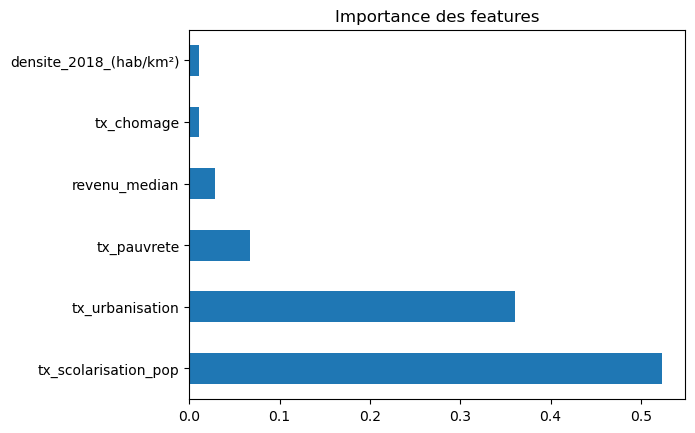

In [12]:
#Visualisation Importance
importance_mse1.plot(kind='barh')
plt.title("Importance des features")
plt.show()


##PREPROCESSING - Modèle Socio-eco (mse2) 

In [13]:
#SPLIT dataset into X and Y

features_list_mse2=['tx_pauvrete', 'revenu_median', 'tx_chomage', 'tx_urbanisation', 'densite_2018_(hab/km²)', 'tx_pop_sans_dipl']

print('Splitting dataset into X and Y...')
X_mse2=df[features_list_mse2]

y_mse2=df['tx_crim_pour_100 M_hab']
print('...Done.')

#SPLIT dataset into train test and test...
print('Splitting dataset into train test and test...')
X_mse2_train,X_mse2_test,y_mse2_train,y_mse2_test=train_test_split(X_mse2,y_mse2,
                                                               test_size=0.2,
                                                               random_state=0
                                                               )
print('...Done.')

### Training pipeline ###
print('---Training pipeline---')

# Before preprocessing
print("#### X_train BEFORE preprocessing ####")
print(X_mse2_train.head())  
print()

print("Encoding categorical features and standardizing numerical features...")

#Preprocessing

numeric_transformer = StandardScaler()

# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing

feature_encoder = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_list_mse2)
    ],
)

X_mse2_train=feature_encoder.fit_transform(X_mse2_train)
X_mse2_test=feature_encoder.transform(X_mse2_test)

#Vérification
print('...Done.')
print("#### X_mse_train AFTER preprocessing ####")
print(X_mse2_train[0:5, :])  # affiche les 5 premières lignes



Splitting dataset into X and Y...
...Done.
Splitting dataset into train test and test...
...Done.
---Training pipeline---
#### X_train BEFORE preprocessing ####
    tx_pauvrete  revenu_median  tx_chomage  tx_urbanisation  \
45         14.8        20220.0       8.775             39.5   
26         12.5        21060.0       9.500             55.9   
43         10.1        21910.0       7.550             84.6   
24         11.9        21900.0       8.250             65.4   
6          15.5        21590.0       9.800             95.9   

    densite_2018_(hab/km²)  tx_pop_sans_dipl  
45                    33.0              40.6  
26                    99.0              29.3  
43                   207.0              27.2  
24                   103.0              27.1  
6                    253.0              29.9  

Encoding categorical features and standardizing numerical features...
...Done.
#### X_mse_train AFTER preprocessing ####
[[ 0.23424755 -0.37462328 -0.06736322 -1.69878718 -0.231

#BUILD MODEL(mse2)

In [14]:
# Training model
print("Training model...")
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_mse2_train, y_mse2_train)
print("...Done.")

# Predictions on training set
print("Predictions on train set...")
y_mse2_train_pred = regressor.predict(X_mse2_train)
print("...Done.")
print()

# Afficher les 5 premières prédictions train vs valeurs réelles
for vrai, pred in zip(y_mse2_train[:5], y_mse2_train_pred[:5]):
    print(f"Réel: {vrai:.2f}  →  Prédit: {pred:.2f}")

# Predictions on test set
print("Predictions on test set...")
y_mse2_test_pred = regressor.predict(X_mse2_test)
print("...Done.")

# Afficher les 5 premières prédictions test vs valeurs réelles
for vrai, pred in zip(y_mse2_test[:5], y_mse2_test_pred[:5]):
    print(f"Réel: {vrai:.2f}  →  Prédit: {pred:.2f}")



Training model...
...Done.
Predictions on train set...
...Done.

Réel: 3058.77  →  Prédit: 3058.77
Réel: 3459.87  →  Prédit: 3459.87
Réel: 5485.09  →  Prédit: 5485.09
Réel: 3716.24  →  Prédit: 3716.24
Réel: 6036.22  →  Prédit: 6036.22
Predictions on test set...
...Done.
Réel: 3752.92  →  Prédit: 2936.13
Réel: 5960.13  →  Prédit: 5485.09
Réel: 3565.43  →  Prédit: 3732.11
Réel: 3754.38  →  Prédit: 2936.13
Réel: 7010.70  →  Prédit: 6036.22


#EVALUATE MODEL(mse2)

In [15]:
# Performance assessment
print("--- Assessing the performances of the model ---")

r2_train_mse2=regressor.score(X_mse2_train, y_mse2_train)
r2_test_mse2=regressor.score(X_mse2_test, y_mse2_test)

# Print R^2 scores
print("R2 score on training set : ", r2_train_mse2)
print("R2 score on test set : ", r2_test_mse2)


--- Assessing the performances of the model ---
R2 score on training set :  1.0
R2 score on test set :  0.5136149933867229


#Features Importance(mse2)

In [16]:
# Importance assessment

importance_mse2 = pd.Series(regressor.feature_importances_, index=features_list_mse2)
importance_mse2.sort_values(ascending=False, inplace=True)
print("Importance des features :")
print(importance_mse2)

df_imp_mse2 = importance_mse2.reset_index()
df_imp_mse2.columns = ['Feature', 'Importance']
df_imp_mse2['Model'] = 'MSE2'



Importance des features :
densite_2018_(hab/km²)    0.507193
tx_urbanisation           0.361518
tx_pauvrete               0.068894
revenu_median             0.031004
tx_chomage                0.022849
tx_pop_sans_dipl          0.008542
dtype: float64


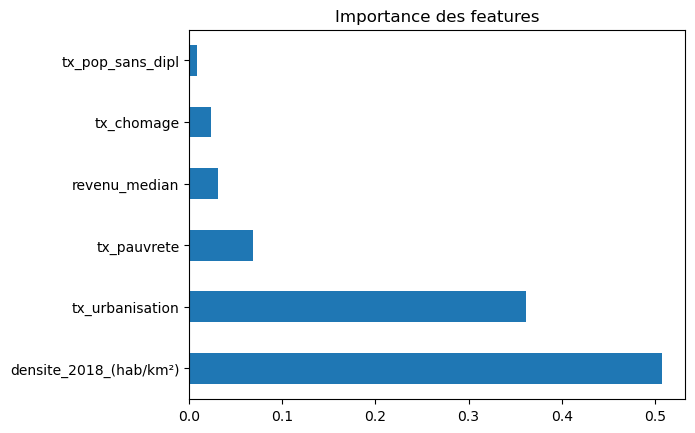

In [17]:
#Visualisation Importance

importance_mse2.plot(kind='barh')
plt.title("Importance des features")
plt.show()


##PREPROCESSING - Modèle Socio (ms1)

In [18]:
#SPLIT dataset into X and Y

features_list_ms1=['tx_urbanisation', 'densite_2018_(hab/km²)', 'tx_scolarisation_pop']

print('Splitting dataset into X and Y...')
X_ms1=df[features_list_ms1]

y_ms1=df['tx_crim_pour_100 M_hab']
print('...Done.')

#SPLIT dataset into train test and test...
print('Splitting dataset into train test and test...')
X_ms1_train,X_ms1_test,y_ms1_train,y_ms1_test=train_test_split(X_ms1,y_ms1,
                                                               test_size=0.2,
                                                               random_state=0
                                                               )
print('...Done.')

### Training pipeline ###
print('---Training pipeline---')

# Before preprocessing
print("#### X_train BEFORE preprocessing ####")
print(X_ms1_train.head())  
print()

print("Encoding categorical features and standardizing numerical features...")

#Preprocessing

numeric_transformer = StandardScaler()

# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing

feature_encoder = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_list_ms1)
    ],
)

X_ms1_train=feature_encoder.fit_transform(X_ms1_train)
X_ms1_test=feature_encoder.transform(X_ms1_test)

#Vérification
print('...Done.')
print("#### X_ms1_train AFTER preprocessing ####")
print(X_ms1_train[0:5, :])  # affiche les 5 premières lignes



Splitting dataset into X and Y...
...Done.
Splitting dataset into train test and test...
...Done.
---Training pipeline---
#### X_train BEFORE preprocessing ####
    tx_urbanisation  densite_2018_(hab/km²)  tx_scolarisation_pop
45             39.5                    33.0             58.993269
26             55.9                    99.0             57.975449
43             84.6                   207.0             61.518670
24             65.4                   103.0             61.161864
6              95.9                   253.0             60.914730

Encoding categorical features and standardizing numerical features...
...Done.
#### X_ms1_train AFTER preprocessing ####
[[-1.69878718 -0.23176585 -0.52553096]
 [-0.71150798 -0.20750791 -1.09414242]
 [ 1.01623063 -0.1678131   0.88529893]
 [-0.13960844 -0.20603773  0.68596704]
 [ 1.69649008 -0.15090605  0.54790421]]


##BUILD MODEL(ms1)

In [19]:
# Training model
print("Training model...")
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_ms1_train, y_ms1_train)
print("...Done.")

# Predictions on training set
print("Predictions on train set...")
y_ms1_train_pred = regressor.predict(X_ms1_train)
print("...Done.")
print()

# Afficher les 5 premières prédictions train vs valeurs réelles
for vrai, pred in zip(y_ms1_train[:5], y_ms1_train_pred[:5]):
    print(f"Réel: {vrai:.2f}  →  Prédit: {pred:.2f}")

# Predictions on test set
print("Predictions on test set...")
y_ms1_test_pred = regressor.predict(X_ms1_test)
print("...Done.")

# Afficher les 5 premières prédictions test vs valeurs réelles
for vrai, pred in zip(y_ms1_test[:5], y_ms1_test_pred[:5]):
    print(f"Réel: {vrai:.2f}  →  Prédit: {pred:.2f}")



Training model...
...Done.
Predictions on train set...
...Done.

Réel: 3058.77  →  Prédit: 3058.77
Réel: 3459.87  →  Prédit: 3459.87
Réel: 5485.09  →  Prédit: 5485.09
Réel: 3716.24  →  Prédit: 3716.24
Réel: 6036.22  →  Prédit: 6036.22
Predictions on test set...
...Done.
Réel: 3752.92  →  Prédit: 3198.01
Réel: 5960.13  →  Prédit: 4712.13
Réel: 3565.43  →  Prédit: 4086.39
Réel: 3754.38  →  Prédit: 3268.79
Réel: 7010.70  →  Prédit: 6036.22


#EVALUATE MODEL(ms1)

In [20]:
# Performance assessment
print("--- Assessing the performances of the model ---")

r2_train_ms1=regressor.score(X_ms1_train, y_ms1_train)
r2_test_ms1=regressor.score(X_ms1_test, y_ms1_test)

# Print R^2 scores
print("R2 score on training set : ", r2_train_ms1)
print("R2 score on test set : ", r2_test_ms1)


--- Assessing the performances of the model ---
R2 score on training set :  1.0
R2 score on test set :  0.5945860678788499


#Features Importance(ms1)

In [21]:
#Importa,ce assessment

importance_ms1 = pd.Series(regressor.feature_importances_, index=features_list_ms1)
importance_ms1.sort_values(ascending=False, inplace=True)
print("Importance des features :")
print(importance_ms1)

df_imp_ms1 = importance_ms1.reset_index()
df_imp_ms1.columns = ['Feature', 'Importance']
df_imp_ms1['Model'] = 'MS1'



Importance des features :
tx_scolarisation_pop      0.542184
tx_urbanisation           0.408981
densite_2018_(hab/km²)    0.048835
dtype: float64


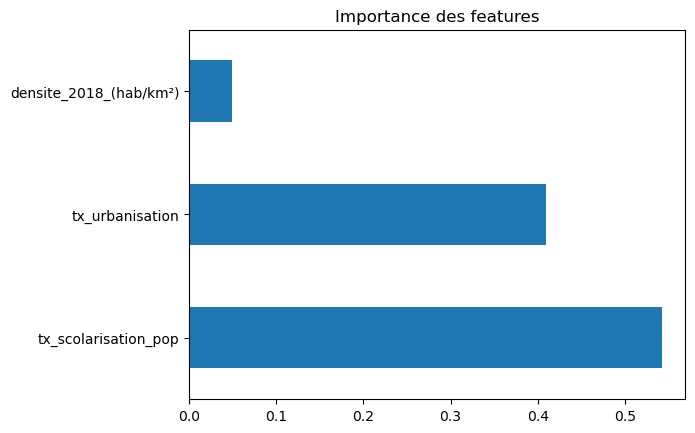

In [22]:
#Visualisation Importance

importance_ms1.plot(kind='barh')
plt.title("Importance des features")
plt.show()


##PREPROCESSING - Modèle Socio (ms2)

In [23]:
#SPLIT dataset into X and Y

features_list_ms2=['tx_urbanisation', 'densite_2018_(hab/km²)', 'tx_pop_sans_dipl']

print('Splitting dataset into X and Y...')
X_ms2=df[features_list_ms2]

y_ms2=df['tx_crim_pour_100 M_hab']
print('...Done.')

#SPLIT dataset into train test and test...
print('Splitting dataset into train test and test...')
X_ms2_train,X_ms2_test,y_ms2_train,y_ms2_test=train_test_split(X_ms2,y_ms2,
                                                               test_size=0.2,
                                                               random_state=0
                                                               )
print('...Done.')

### Training pipeline ###
print('---Training pipeline---')

# Before preprocessing
print("#### X_train BEFORE preprocessing ####")
print(X_ms2_train.head())  
print()

print("Encoding categorical features and standardizing numerical features...")

#Preprocessing

numeric_transformer = StandardScaler()

# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing

feature_encoder = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_list_ms2)
    ],
)

X_ms2_train=feature_encoder.fit_transform(X_ms2_train)
X_ms2_test=feature_encoder.transform(X_ms2_test)

#Vérification
print('...Done.')
print("#### X_ms2_train AFTER preprocessing ####")
print(X_ms2_train[0:5, :])  # affiche les 5 premières lignes



Splitting dataset into X and Y...
...Done.
Splitting dataset into train test and test...
...Done.
---Training pipeline---
#### X_train BEFORE preprocessing ####
    tx_urbanisation  densite_2018_(hab/km²)  tx_pop_sans_dipl
45             39.5                    33.0              40.6
26             55.9                    99.0              29.3
43             84.6                   207.0              27.2
24             65.4                   103.0              27.1
6              95.9                   253.0              29.9

Encoding categorical features and standardizing numerical features...
...Done.
#### X_ms2_train AFTER preprocessing ####
[[-1.69878718 -0.23176585  1.79400418]
 [-0.71150798 -0.20750791 -0.53772611]
 [ 1.01623063 -0.1678131  -0.97105652]
 [-0.13960844 -0.20603773 -0.9916913 ]
 [ 1.69649008 -0.15090605 -0.41391742]]


#BUILD MODEL(ms2)

In [24]:
# Training model
print("Training model...")
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_ms2_train, y_ms2_train)
print("...Done.")

# Predictions on training set
print("Predictions on train set...")
y_ms2_train_pred = regressor.predict(X_ms2_train)
print("...Done.")
print()

# Afficher les 5 premières prédictions train vs valeurs réelles
for vrai, pred in zip(y_ms2_train[:5], y_ms2_train_pred[:5]):
    print(f"Réel: {vrai:.2f}  →  Prédit: {pred:.2f}")

# Predictions on test set
print("Predictions on test set...")
y_ms2_test_pred = regressor.predict(X_ms2_test)
print("...Done.")

# Afficher les 5 premières prédictions test vs valeurs réelles
for vrai, pred in zip(y_ms2_test[:5], y_ms2_test_pred[:5]):
    print(f"Réel: {vrai:.2f}  →  Prédit: {pred:.2f}")



Training model...
...Done.
Predictions on train set...
...Done.

Réel: 3058.77  →  Prédit: 3058.77
Réel: 3459.87  →  Prédit: 3459.87
Réel: 5485.09  →  Prédit: 5485.09
Réel: 3716.24  →  Prédit: 3716.24
Réel: 6036.22  →  Prédit: 6036.22
Predictions on test set...
...Done.
Réel: 3752.92  →  Prédit: 2912.72
Réel: 5960.13  →  Prédit: 4712.13
Réel: 3565.43  →  Prédit: 3608.95
Réel: 3754.38  →  Prédit: 3268.79
Réel: 7010.70  →  Prédit: 6036.22


#EVALUATE MODEL(ms2)

In [25]:
# Performance assessment
print("--- Assessing the performances of the model ---")

r2_train_ms2=regressor.score(X_ms2_train, y_ms2_train)
r2_test_ms2=regressor.score(X_ms2_test, y_ms2_test)

# Print R^2 scores
print("R2 score on training set : ", r2_train_ms2)
print("R2 score on test set : ", r2_test_ms2)


--- Assessing the performances of the model ---
R2 score on training set :  1.0
R2 score on test set :  0.6361711532605487


#Features Importance(ms2)

In [26]:
#Importance assessment

importance_ms2 = pd.Series(regressor.feature_importances_, index=features_list_ms2)
importance_ms2.sort_values(ascending=False, inplace=True)
print("Importance des features :")
print(importance_ms2)

df_imp_ms2 = importance_ms2.reset_index()
df_imp_ms2.columns = ['Feature', 'Importance']
df_imp_ms2['Model'] = 'MS2'



Importance des features :
densite_2018_(hab/km²)    0.534411
tx_urbanisation           0.410251
tx_pop_sans_dipl          0.055338
dtype: float64


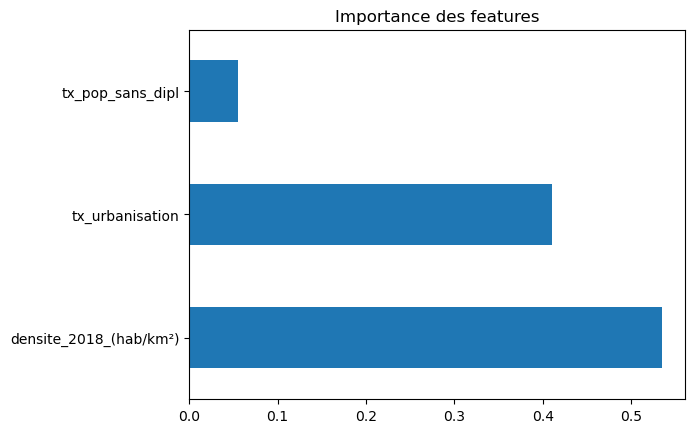

In [27]:
#Visualisation Importance

importance_ms2.plot(kind='barh')
plt.title("Importance des features")
plt.show()


##PREPROCESSING - Modèle Socio + tx chomage (ms1ptc)

In [28]:
#SPLIT dataset into X and Y

features_list_ms1ptc=['tx_chomage','tx_urbanisation', 'densite_2018_(hab/km²)', 'tx_scolarisation_pop']

print('Splitting dataset into X and Y...')
X_ms1ptc=df[features_list_ms1ptc]

y_ms1ptc=df['tx_crim_pour_100 M_hab']
print('...Done.')

#SPLIT dataset into train test and test...
print('Splitting dataset into train test and test...')
X_ms1ptc_train,X_ms1ptc_test,y_ms1ptc_train,y_ms1ptc_test=train_test_split(X_ms1ptc,y_ms1ptc,
                                                               test_size=0.2,
                                                               random_state=0
                                                               )
print('...Done.')

### Training pipeline ###
print('---Training pipeline---')

# Before preprocessing
print("#### X_train BEFORE preprocessing ####")
print(X_ms1ptc_train.head())  
print()

print("Encoding categorical features and standardizing numerical features...")

#Preprocessing

numeric_transformer = StandardScaler()

# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing

feature_encoder = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_list_ms1ptc)
    ],
)

X_ms1ptc_train=feature_encoder.fit_transform(X_ms1ptc_train)
X_ms1ptc_test=feature_encoder.transform(X_ms1ptc_test)

#Vérification
print('...Done.')
print("#### X_ms_train AFTER preprocessing ####")
print(X_ms1ptc_train[0:5, :])  # affiche les 5 premières lignes



Splitting dataset into X and Y...
...Done.
Splitting dataset into train test and test...
...Done.
---Training pipeline---
#### X_train BEFORE preprocessing ####
    tx_chomage  tx_urbanisation  densite_2018_(hab/km²)  tx_scolarisation_pop
45       8.775             39.5                    33.0             58.993269
26       9.500             55.9                    99.0             57.975449
43       7.550             84.6                   207.0             61.518670
24       8.250             65.4                   103.0             61.161864
6        9.800             95.9                   253.0             60.914730

Encoding categorical features and standardizing numerical features...
...Done.
#### X_ms_train AFTER preprocessing ####
[[-0.06736322 -1.69878718 -0.23176585 -0.52553096]
 [ 0.37319624 -0.71150798 -0.20750791 -1.09414242]
 [-0.81175679  1.01623063 -0.1678131   0.88529893]
 [-0.38638904 -0.13960844 -0.20603773  0.68596704]
 [ 0.5554967   1.69649008 -0.15090605  0.54790

#BUILD MODEL(ms1ptc)

In [29]:
# Training model
print("Training model...")
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_ms1ptc_train, y_ms1ptc_train)
print("...Done.")

# Predictions on training set
print("Predictions on train set...")
y_ms1ptc_train_pred = regressor.predict(X_ms1ptc_train)
print("...Done.")
print()

# Afficher les 5 premières prédictions train vs valeurs réelles
for vrai, pred in zip(y_ms1ptc_train[:5], y_ms1ptc_train_pred[:5]):
    print(f"Réel: {vrai:.2f}  →  Prédit: {pred:.2f}")

# Predictions on test set
print("Predictions on test set...")
y_ms1ptc_test_pred = regressor.predict(X_ms1ptc_test)
print("...Done.")

# Afficher les 5 premières prédictions test vs valeurs réelles
for vrai, pred in zip(y_ms1ptc_test[:5], y_ms1ptc_test_pred[:5]):
    print(f"Réel: {vrai:.2f}  →  Prédit: {pred:.2f}")



Training model...
...Done.
Predictions on train set...
...Done.

Réel: 3058.77  →  Prédit: 3058.77
Réel: 3459.87  →  Prédit: 3459.87
Réel: 5485.09  →  Prédit: 5485.09
Réel: 3716.24  →  Prédit: 3716.24
Réel: 6036.22  →  Prédit: 6036.22
Predictions on test set...
...Done.
Réel: 3752.92  →  Prédit: 2936.13
Réel: 5960.13  →  Prédit: 5275.47
Réel: 3565.43  →  Prédit: 3758.48
Réel: 3754.38  →  Prédit: 3268.79
Réel: 7010.70  →  Prédit: 8062.60


#EVALUATE MODEL(ms1ptc)

In [30]:
# Performance assessment
print("--- Assessing the performances of the model ---")

r2_train_ms1ptc=regressor.score(X_ms1ptc_train, y_ms1ptc_train)
r2_test_ms1ptc=regressor.score(X_ms1ptc_test, y_ms1ptc_test)

# Print R^2 scores
print("R2 score on training set : ", r2_train_ms1ptc)
print("R2 score on test set : ", r2_test_ms1ptc)


--- Assessing the performances of the model ---
R2 score on training set :  1.0
R2 score on test set :  0.694065679921047


#Features Importance (ms1ptc)

In [31]:
#Importance assessment

importance_ms1ptc = pd.Series(regressor.feature_importances_, index=features_list_ms1ptc)
importance_ms1ptc.sort_values(ascending=False, inplace=True)
print("Importance des features :")
print(importance_ms1ptc)

df_imp_ms1ptc = importance_ms1ptc.reset_index()
df_imp_ms1ptc.columns = ['Feature', 'Importance']
df_imp_ms1ptc['Model'] = 'MS1PTC'



Importance des features :
tx_scolarisation_pop      0.538074
tx_urbanisation           0.379650
tx_chomage                0.063835
densite_2018_(hab/km²)    0.018440
dtype: float64


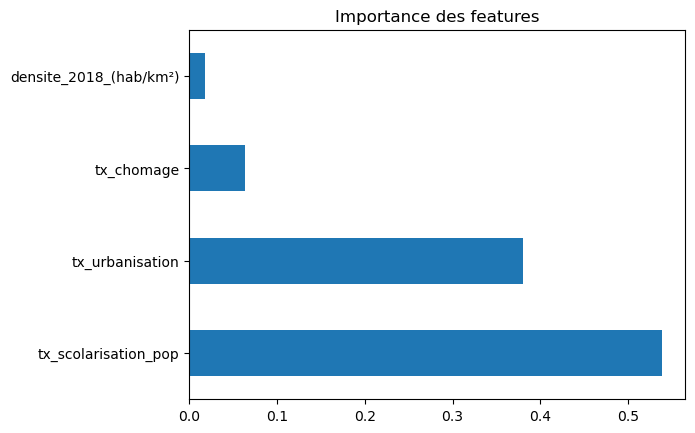

In [32]:
#Visualisation Importance

importance_ms1ptc.plot(kind='barh')
plt.title("Importance des features")
plt.show()


##PREPROCESSING - Modèle Socio + tx chomage (ms2ptc)

In [33]:
#SPLIT dataset into X and Y

features_list_ms2ptc=['tx_chomage','tx_urbanisation', 'densite_2018_(hab/km²)', 'tx_pop_sans_dipl']

print('Splitting dataset into X and Y...')
X_ms2ptc=df[features_list_ms2ptc]

y_ms2ptc=df['tx_crim_pour_100 M_hab']
print('...Done.')

#SPLIT dataset into train test and test...
print('Splitting dataset into train test and test...')
X_ms2ptc_train,X_ms2ptc_test,y_ms2ptc_train,y_ms2ptc_test=train_test_split(X_ms2ptc,y_ms2ptc,
                                                               test_size=0.2,
                                                               random_state=0
                                                               )
print('...Done.')

### Training pipeline ###
print('---Training pipeline---')

# Before preprocessing
print("#### X_train BEFORE preprocessing ####")
print(X_ms2ptc_train.head())  
print()

print("Encoding categorical features and standardizing numerical features...")

#Preprocessing

numeric_transformer = StandardScaler()

# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing

feature_encoder = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_list_ms2ptc)
    ],
)

X_ms2ptc_train=feature_encoder.fit_transform(X_ms2ptc_train)
X_ms2ptc_test=feature_encoder.transform(X_ms2ptc_test)

#Vérification
print('...Done.')
print("#### X_ms_train AFTER preprocessing ####")
print(X_ms2ptc_train[0:5, :])  # affiche les 5 premières lignes



Splitting dataset into X and Y...
...Done.
Splitting dataset into train test and test...
...Done.
---Training pipeline---
#### X_train BEFORE preprocessing ####
    tx_chomage  tx_urbanisation  densite_2018_(hab/km²)  tx_pop_sans_dipl
45       8.775             39.5                    33.0              40.6
26       9.500             55.9                    99.0              29.3
43       7.550             84.6                   207.0              27.2
24       8.250             65.4                   103.0              27.1
6        9.800             95.9                   253.0              29.9

Encoding categorical features and standardizing numerical features...
...Done.
#### X_ms_train AFTER preprocessing ####
[[-0.06736322 -1.69878718 -0.23176585  1.79400418]
 [ 0.37319624 -0.71150798 -0.20750791 -0.53772611]
 [-0.81175679  1.01623063 -0.1678131  -0.97105652]
 [-0.38638904 -0.13960844 -0.20603773 -0.9916913 ]
 [ 0.5554967   1.69649008 -0.15090605 -0.41391742]]


#BUILD MODEL(ms2ptc)

In [34]:
# Training model
print("Training model...")
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_ms2ptc_train, y_ms2ptc_train)
print("...Done.")

# Predictions on training set
print("Predictions on train set...")
y_ms2ptc_train_pred = regressor.predict(X_ms2ptc_train)
print("...Done.")
print()

# Afficher les 5 premières prédictions train vs valeurs réelles
for vrai, pred in zip(y_ms2ptc_train[:5], y_ms2ptc_train_pred[:5]):
    print(f"Réel: {vrai:.2f}  →  Prédit: {pred:.2f}")

# Predictions on test set
print("Predictions on test set...")
y_ms2ptc_test_pred = regressor.predict(X_ms2ptc_test)
print("...Done.")

# Afficher les 5 premières prédictions test vs valeurs réelles
for vrai, pred in zip(y_ms2ptc_test[:5], y_ms2ptc_test_pred[:5]):
    print(f"Réel: {vrai:.2f}  →  Prédit: {pred:.2f}")



Training model...
...Done.
Predictions on train set...
...Done.

Réel: 3058.77  →  Prédit: 3058.77
Réel: 3459.87  →  Prédit: 3459.87
Réel: 5485.09  →  Prédit: 5485.09
Réel: 3716.24  →  Prédit: 3716.24
Réel: 6036.22  →  Prédit: 6036.22
Predictions on test set...
...Done.
Réel: 3752.92  →  Prédit: 3415.84
Réel: 5960.13  →  Prédit: 5485.09
Réel: 3565.43  →  Prédit: 4108.35
Réel: 3754.38  →  Prédit: 4314.04
Réel: 7010.70  →  Prédit: 8062.60


#EVALUATE MODEL(ms2ptc)

In [35]:
# Performance assessment
print("--- Assessing the performances of the model ---")

r2_train_ms2ptc=regressor.score(X_ms2ptc_train, y_ms2ptc_train)
r2_test_ms2ptc=regressor.score(X_ms2ptc_test, y_ms2ptc_test)

# Print R^2 scores
print("R2 score on training set : ", r2_train_ms2ptc)
print("R2 score on test set : ", r2_test_ms2ptc)


--- Assessing the performances of the model ---
R2 score on training set :  1.0
R2 score on test set :  0.6370807021129272


#Features Importance (ms2ptc)

In [36]:
# Importance assessment

importance_ms2ptc = pd.Series(regressor.feature_importances_, index=features_list_ms2ptc)
importance_ms2ptc.sort_values(ascending=False, inplace=True)
print("Importance des features :")
print(importance_ms2ptc)

df_imp_ms2ptc = importance_ms2ptc.reset_index()
df_imp_ms2ptc.columns = ['Feature', 'Importance']
df_imp_ms2ptc['Model'] = 'MS2PTC'



Importance des features :
densite_2018_(hab/km²)    0.516385
tx_urbanisation           0.386914
tx_chomage                0.068430
tx_pop_sans_dipl          0.028271
dtype: float64


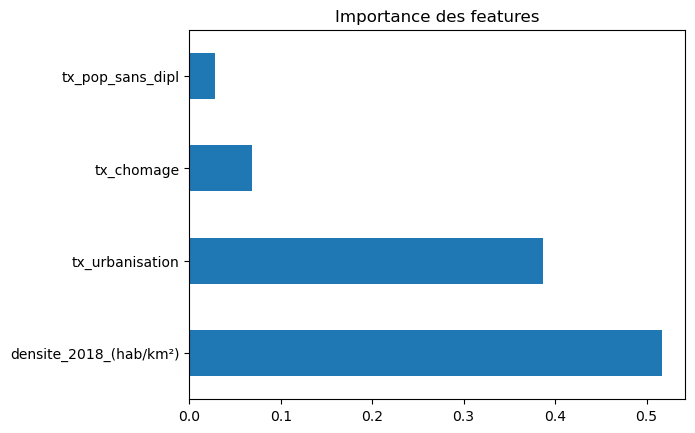

In [37]:
#Visualisation Importance

importance_ms2ptc.plot(kind='barh')
plt.title("Importance des features")
plt.show()


##PREPROCESSING - Modèle Socio + tx pauvrete (ms1ptp)

In [38]:
#SPLIT dataset into X and Y

features_list_ms1ptp=['tx_pauvrete','tx_urbanisation', 'densite_2018_(hab/km²)', 'tx_scolarisation_pop']

print('Splitting dataset into X and Y...')
X_ms1ptp=df[features_list_ms1ptp]

y_ms1ptp=df['tx_crim_pour_100 M_hab']
print('...Done.')

#SPLIT dataset into train test and test...
print('Splitting dataset into train test and test...')
X_ms1ptp_train,X_ms1ptp_test,y_ms1ptp_train,y_ms1ptp_test=train_test_split(X_ms1ptp,y_ms1ptp,
                                                               test_size=0.2,
                                                               random_state=0
                                                               )
print('...Done.')

### Training pipeline ###
print('---Training pipeline---')

# Before preprocessing
print("#### X_train BEFORE preprocessing ####")
print(X_ms1ptp_train.head())  
print()

print("Encoding categorical features and standardizing numerical features...")

#Preprocessing

numeric_transformer = StandardScaler()

# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing

feature_encoder = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_list_ms1ptp)
    ],
)

X_ms1ptp_train=feature_encoder.fit_transform(X_ms1ptp_train)
X_ms1ptp_test=feature_encoder.transform(X_ms1ptp_test)

#Vérification
print('...Done.')
print("#### X_ms_train AFTER preprocessing ####")
print(X_ms1ptp_train[0:5, :])  # affiche les 5 premières lignes



Splitting dataset into X and Y...
...Done.
Splitting dataset into train test and test...
...Done.
---Training pipeline---
#### X_train BEFORE preprocessing ####
    tx_pauvrete  tx_urbanisation  densite_2018_(hab/km²)  tx_scolarisation_pop
45         14.8             39.5                    33.0             58.993269
26         12.5             55.9                    99.0             57.975449
43         10.1             84.6                   207.0             61.518670
24         11.9             65.4                   103.0             61.161864
6          15.5             95.9                   253.0             60.914730

Encoding categorical features and standardizing numerical features...
...Done.
#### X_ms_train AFTER preprocessing ####
[[ 0.23424755 -1.69878718 -0.23176585 -0.52553096]
 [-0.54052013 -0.71150798 -0.20750791 -1.09414242]
 [-1.34897337  1.01623063 -0.1678131   0.88529893]
 [-0.74263344 -0.13960844 -0.20603773  0.68596704]
 [ 0.47004641  1.69649008 -0.15090605  0

#BUILD MODEL(ms1ptp)

In [39]:
# Training model
print("Training model...")
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_ms1ptp_train, y_ms1ptp_train)
print("...Done.")

# Predictions on training set
print("Predictions on train set...")
y_ms1ptp_train_pred = regressor.predict(X_ms1ptp_train)
print("...Done.")
print()

# Afficher les 5 premières prédictions train vs valeurs réelles
for vrai, pred in zip(y_ms1ptp_train[:5], y_ms1ptp_train_pred[:5]):
    print(f"Réel: {vrai:.2f}  →  Prédit: {pred:.2f}")

# Predictions on test set
print("Predictions on test set...")
y_ms1ptp_test_pred = regressor.predict(X_ms1ptp_test)
print("...Done.")

# Afficher les 5 premières prédictions test vs valeurs réelles
for vrai, pred in zip(y_ms1ptp_test[:5], y_ms1ptp_test_pred[:5]):
    print(f"Réel: {vrai:.2f}  →  Prédit: {pred:.2f}")



Training model...
...Done.
Predictions on train set...
...Done.

Réel: 3058.77  →  Prédit: 3058.77
Réel: 3459.87  →  Prédit: 3459.87
Réel: 5485.09  →  Prédit: 5485.09
Réel: 3716.24  →  Prédit: 3716.24
Réel: 6036.22  →  Prédit: 6036.22
Predictions on test set...
...Done.
Réel: 3752.92  →  Prédit: 2936.13
Réel: 5960.13  →  Prédit: 5275.47
Réel: 3565.43  →  Prédit: 4416.08
Réel: 3754.38  →  Prédit: 3268.79
Réel: 7010.70  →  Prédit: 5816.38


#EVALUATE MODEL(ms1ptp)

In [40]:
# Performance assessment
print("--- Assessing the performances of the model ---")

r2_train_ms1ptp=regressor.score(X_ms1ptp_train, y_ms1ptp_train)
r2_test_ms1ptp=regressor.score(X_ms1ptp_test, y_ms1ptp_test)

# Print R^2 scores
print("R2 score on training set : ", r2_train_ms1ptp)
print("R2 score on test set : ", r2_test_ms1ptp)


--- Assessing the performances of the model ---
R2 score on training set :  1.0
R2 score on test set :  0.6318531513572674


#Features Importance (ms1ptp)

In [41]:
# Importance assessment

importance_ms1ptp = pd.Series(regressor.feature_importances_, index=features_list_ms1ptp)
importance_ms1ptp.sort_values(ascending=False, inplace=True)
print("Importance des features :")
print(importance_ms1ptp)

df_imp_ms1ptp = importance_ms1ptp.reset_index()
df_imp_ms1ptp.columns = ['Feature', 'Importance']
df_imp_ms1ptp['Model'] = 'MS1PTP'


Importance des features :
tx_scolarisation_pop      0.532848
tx_urbanisation           0.379148
tx_pauvrete               0.063033
densite_2018_(hab/km²)    0.024971
dtype: float64


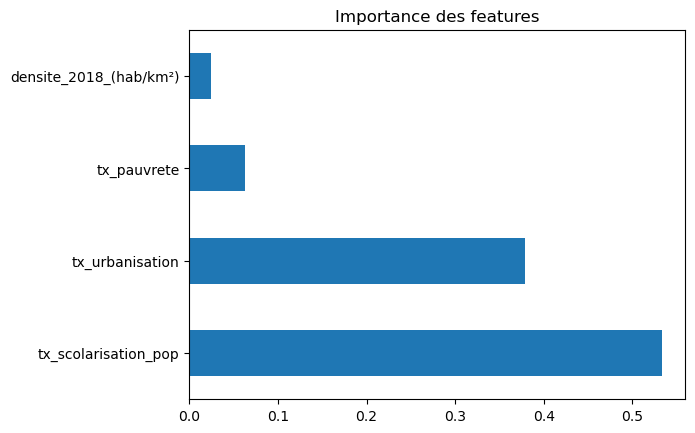

In [42]:
#visualisation Importance
importance_ms1ptp.plot(kind='barh')
plt.title("Importance des features")
plt.show()


##PREPROCESSING - Modèle Socio + tx pauvrete (ms2ptp)

In [43]:
#SPLIT dataset into X and Y

features_list_ms2ptp=['tx_pauvrete','tx_urbanisation', 'densite_2018_(hab/km²)', 'tx_scolarisation_pop']

print('Splitting dataset into X and Y...')
X_ms2ptp=df[features_list_ms2ptp]

y_ms2ptp=df['tx_crim_pour_100 M_hab']
print('...Done.')

#SPLIT dataset into train test and test...
print('Splitting dataset into train test and test...')
X_ms2ptp_train,X_ms2ptp_test,y_ms2ptp_train,y_ms2ptp_test=train_test_split(X_ms2ptp,y_ms2ptp,
                                                               test_size=0.2,
                                                               random_state=0
                                                               )
print('...Done.')

### Training pipeline ###
print('---Training pipeline---')

# Before preprocessing
print("#### X_train BEFORE preprocessing ####")
print(X_ms2ptp_train.head())  
print()

print("Encoding categorical features and standardizing numerical features...")

#Preprocessing

numeric_transformer = StandardScaler()

# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing

feature_encoder = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_list_ms2ptp)
    ],
)

X_ms2ptp_train=feature_encoder.fit_transform(X_ms2ptp_train)
X_ms2ptp_test=feature_encoder.transform(X_ms2ptp_test)

#Vérification
print('...Done.')
print("#### X_ms_train AFTER preprocessing ####")
print(X_ms2ptp_train[0:5, :])  # affiche les 5 premières lignes



Splitting dataset into X and Y...
...Done.
Splitting dataset into train test and test...
...Done.
---Training pipeline---
#### X_train BEFORE preprocessing ####
    tx_pauvrete  tx_urbanisation  densite_2018_(hab/km²)  tx_scolarisation_pop
45         14.8             39.5                    33.0             58.993269
26         12.5             55.9                    99.0             57.975449
43         10.1             84.6                   207.0             61.518670
24         11.9             65.4                   103.0             61.161864
6          15.5             95.9                   253.0             60.914730

Encoding categorical features and standardizing numerical features...
...Done.
#### X_ms_train AFTER preprocessing ####
[[ 0.23424755 -1.69878718 -0.23176585 -0.52553096]
 [-0.54052013 -0.71150798 -0.20750791 -1.09414242]
 [-1.34897337  1.01623063 -0.1678131   0.88529893]
 [-0.74263344 -0.13960844 -0.20603773  0.68596704]
 [ 0.47004641  1.69649008 -0.15090605  0

#BUILD MODEL(ms2ptp)

In [44]:
# Training model
print("Training model...")
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_ms2ptp_train, y_ms2ptp_train)
print("...Done.")

# Predictions on training set
print("Predictions on train set...")
y_ms2ptp_train_pred = regressor.predict(X_ms2ptp_train)
print("...Done.")
print()

# Afficher les 5 premières prédictions train vs valeurs réelles
for vrai, pred in zip(y_ms2ptp_train[:5], y_ms2ptp_train_pred[:5]):
    print(f"Réel: {vrai:.2f}  →  Prédit: {pred:.2f}")

# Predictions on test set
print("Predictions on test set...")
y_ms2ptp_test_pred = regressor.predict(X_ms2ptp_test)
print("...Done.")

# Afficher les 5 premières prédictions test vs valeurs réelles
for vrai, pred in zip(y_ms2ptp_test[:5], y_ms2ptp_test_pred[:5]):
    print(f"Réel: {vrai:.2f}  →  Prédit: {pred:.2f}")



Training model...
...Done.
Predictions on train set...
...Done.

Réel: 3058.77  →  Prédit: 3058.77
Réel: 3459.87  →  Prédit: 3459.87
Réel: 5485.09  →  Prédit: 5485.09
Réel: 3716.24  →  Prédit: 3716.24
Réel: 6036.22  →  Prédit: 6036.22
Predictions on test set...
...Done.
Réel: 3752.92  →  Prédit: 2936.13
Réel: 5960.13  →  Prédit: 5275.47
Réel: 3565.43  →  Prédit: 4416.08
Réel: 3754.38  →  Prédit: 3268.79
Réel: 7010.70  →  Prédit: 5816.38


#EVALUATE MODEL(ms2ptp)

In [45]:
# Performance assessment
print("--- Assessing the performances of the model ---")

r2_train_ms2ptp=regressor.score(X_ms2ptp_train, y_ms2ptp_train)
r2_test_ms2ptp=regressor.score(X_ms2ptp_test, y_ms2ptp_test)

# Print R^2 scores
print("R2 score on training set : ", r2_train_ms2ptp)
print("R2 score on test set : ", r2_test_ms2ptp)


--- Assessing the performances of the model ---
R2 score on training set :  1.0
R2 score on test set :  0.6318531513572674


#Features Importance (ms2ptp)

In [46]:
# Importance assessment

importance_ms2ptp = pd.Series(regressor.feature_importances_, index=features_list_ms2ptp)
importance_ms2ptp.sort_values(ascending=False, inplace=True)
print("Importance des features :")
print(importance_ms2ptp)

df_imp_ms2ptp = importance_ms2ptp.reset_index()
df_imp_ms2ptp.columns = ['Feature', 'Importance']
df_imp_ms2ptp['Model'] = 'MS2PTP'



Importance des features :
tx_scolarisation_pop      0.532848
tx_urbanisation           0.379148
tx_pauvrete               0.063033
densite_2018_(hab/km²)    0.024971
dtype: float64


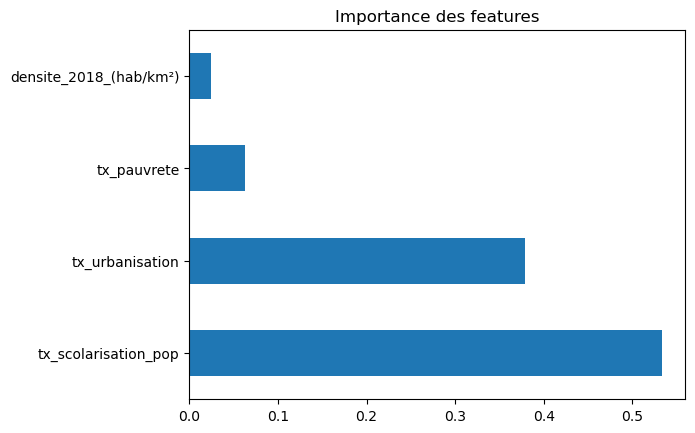

In [47]:
#Visualisation Importance

importance_ms2ptp.plot(kind='barh')
plt.title("Importance des features")
plt.show()


###Regroupement modèles

In [48]:
#création dataframe pour stocké resultat R2 par modèle
df_results = pd.DataFrame({
    'Model': ['MSE1', 'MSE2', 'MS1', 'MS2', 'MS1PTC', 'MS2PTC', 'MS1PTP', 'MS2PTP'],
    'R2_train': [r2_train_mse1, r2_train_mse2, r2_train_ms1, r2_train_ms2,
                 r2_train_ms1ptc, r2_train_ms2ptc, r2_train_ms1ptp, r2_train_ms2ptp],
    'R2_test':  [r2_test_mse1, r2_test_mse2, r2_test_ms1, r2_test_ms2,
                 r2_test_ms1ptc, r2_test_ms2ptc, r2_test_ms1ptp, r2_test_ms2ptp]
})

# Tri par meilleur R2_test
df_results = df_results.sort_values(by='R2_test', ascending=False)

print(df_results)


    Model  R2_train   R2_test
4  MS1PTC       1.0  0.694066
5  MS2PTC       1.0  0.637081
3     MS2       1.0  0.636171
6  MS1PTP       1.0  0.631853
7  MS2PTP       1.0  0.631853
2     MS1       1.0  0.594586
0    MSE1       1.0  0.553871
1    MSE2       1.0  0.513615


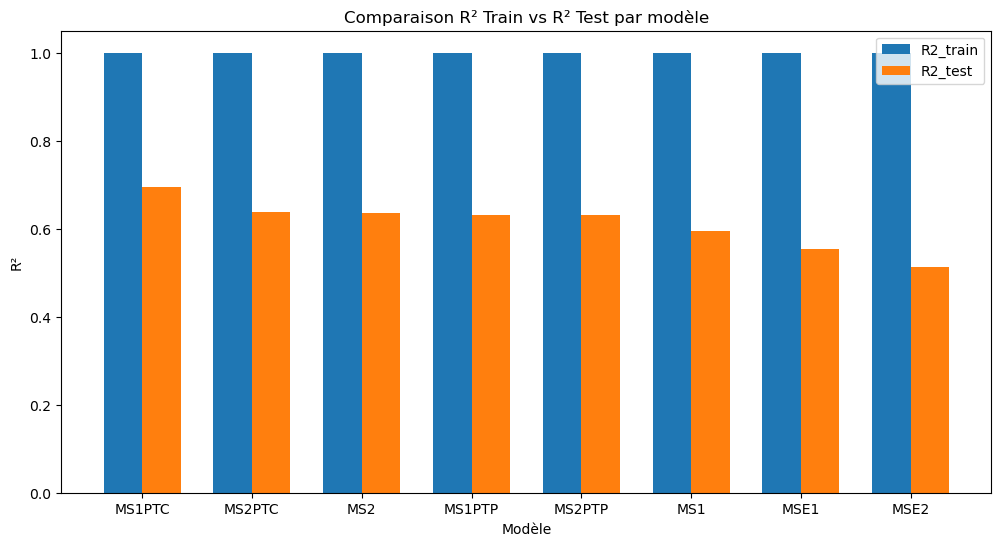

In [49]:
#visualisation comparaison R2 par modèle


x = np.arange(len(df_results['Model']))  # position des modèles
width = 0.35  # largeur des barres

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x - width/2, df_results['R2_train'], width, label='R2_train')
ax.bar(x + width/2, df_results['R2_test'], width, label='R2_test')

ax.set_ylabel('R²')
ax.set_xlabel('Modèle')
ax.set_title('Comparaison R² Train vs R² Test par modèle')
ax.set_xticks(x)
ax.set_xticklabels(df_results['Model'])
ax.legend()

plt.show()


In [50]:
#création dataframe pour stocké Importance par modèle
df_imp = pd.concat([df_imp_mse1, df_imp_mse2, df_imp_ms1, df_imp_ms2,
                    df_imp_ms1ptc, df_imp_ms2ptc, df_imp_ms1ptp, df_imp_ms2ptp],axis=0,
                   ignore_index=True)


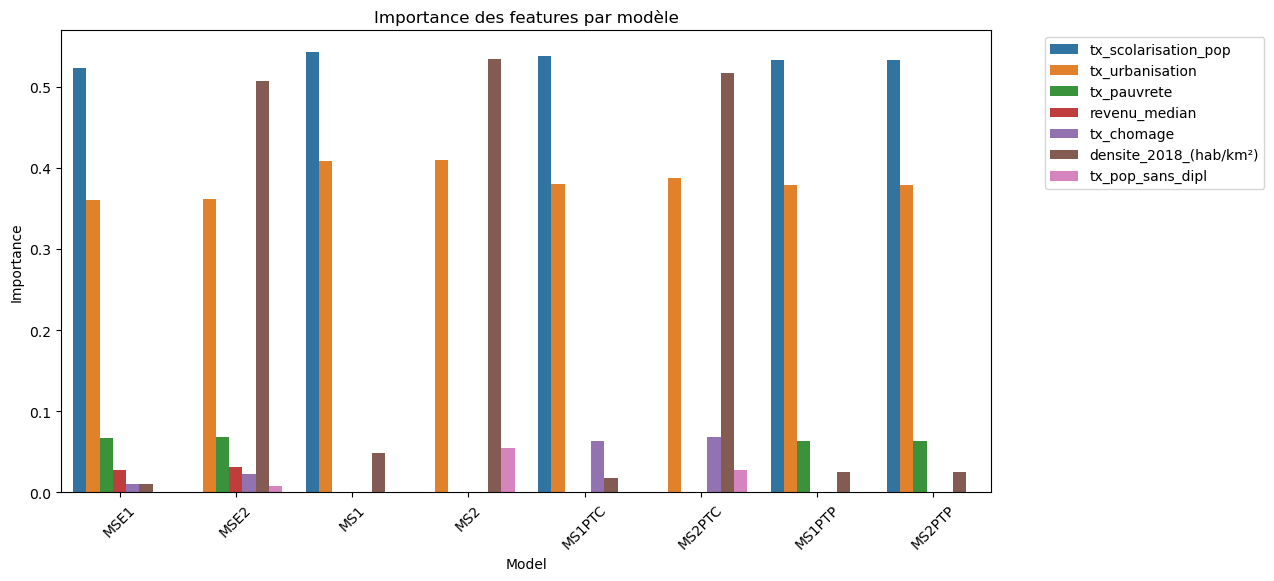

In [51]:
#visualisation Importance
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(x='Model', y='Importance', hue='Feature', data=df_imp)
plt.title('Importance des features par modèle')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
